<a href="https://colab.research.google.com/github/JuanParias29/BigDataProcessing/blob/main/Entrega_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entendimiento del Negocio**

* **Desigualdad educativa en Colombia**  
En Colombia, la calidad educativa presenta notables diferencias entre las grandes ciudades como Bogotá y Medellín, y ciudades más pequeñas como Armenia y Neiva. Las ciudades más pequeñas, ubicadas en regiones con menores recursos y oferta académica, enfrentan desafíos significativos en comparación con las principales urbes del país.

* **Factores influyentes**  
Diversos factores, como el acceso a recursos educativos, la conectividad a Internet y el nivel socioeconómico de las familias, influyen en los resultados de la prueba ICFES 11, evidenciando la desigualdad educativa en distintas zonas del país.

* **Fuente de datos**  
El análisis de esta situación se basa en datos provenientes de fuentes oficiales y abiertas, como los datos abiertos de Colombia y el **DANE** (Departamento Administrativo Nacional de Estadística). Estos datos permiten realizar un análisis detallado y contrastante, proporcionando una representación objetiva de la situación educativa en diferentes regiones del país.

* **Indicadores macroeconómicos**  
Además de los datos educativos, se consideran indicadores macroeconómicos como el desempleo, la pobreza y la inversión pública para comprender mejor los desafíos educativos específicos de cada región.

---

# Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una fase clave en el análisis de datos que nos ayuda a comprender el comportamiento del conjunto de datos. Su objetivo es:

1. **Detectar datos atípicos**: Identificar valores que se desvían significativamente de la norma y decidir si se deben eliminar o investigar.

2. **Encontrar valores nulos**: Localizar datos faltantes para evaluar cómo afectan al análisis y decidir cómo manejarlos.

3. **Identificar patrones y tendencias**: Descubrir relaciones entre variables y comportamientos generales dentro del conjunto de datos.

4. **Revisar distribuciones**: Analizar la distribución de las variables para entender su comportamiento y detectar sesgos.

5. **Obtener estadísticas descriptivas**: Resumir las principales características de los datos, como la media, mediana y desviación estándar.

In [ ]:
# Importar las librerias
import pandas as pd
import numpy as np
from pandas import DataFrame

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Matemáticas, tiempo, manipulación
import math
import time
import os

# Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Estadisticas_educacion_2016-2022.csv"

/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Estadisticas_educacion_2016-2022.csv


In [ ]:
# Ruta de los diccionarios de datos en Google Drive
file_path1 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Estadisticas_educacion_2016-2022.csv'
file_path2 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Estadisticas_matriculas_2016-2020.csv'
file_path3 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Inversion_municipal_Duque.csv'
file_path4 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Penetracion_internet_2016-2022.csv'
file_path5 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Indice_pobreza_2019-2022.csv'
file_path6 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_armenia.csv'
file_path7 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_bogota.csv'
file_path8 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_medellin.csv'
file_path9 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_neiva.csv'

# Cargar el archivo desde Google Drive
educacion = pd.read_csv(file_path1)
matriculas = pd.read_csv(file_path2)
inversion = pd.read_csv(file_path3)
internet = pd.read_csv(file_path4)
pobreza = pd.read_csv(file_path5)
icfes_armenia = pd.read_csv(file_path6)
icfes_bogota = pd.read_csv(file_path7)
icfes_medellin = pd.read_csv(file_path8)
icfes_neiva = pd.read_csv(file_path9)

<ipython-input-3-df48e3e2f527>:17: DtypeWarning: Columns (0,1,25,26,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  pobreza = pd.read_csv(file_path5)
<ipython-input-3-df48e3e2f527>:20: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  icfes_medellin = pd.read_csv(file_path8)


---
## **🛜 Internet por Municipio**

### 📚Descripción general del contenido de los conjuntos de datos
- Los conjuntos de datos incluyen información sobre el acceso a Internet fijo en Colombia, detallando el número de suscriptores con conexión dedicada por departamento y municipio, con reportes trimestrales desde 2015-4T hasta el último trimestre disponible. Además, presentan el porcentaje de penetración de Internet fijo, calculado con base en las proyecciones de población del DANE. También contienen datos sobre la Matrícula en Educación Superior, desagregados por nivel de formación y municipio, permitiendo el análisis de su distribución y evolución en el país.

In [ ]:
# Mostrar las primeras filas del dataset
display(internet.head())

# Mostrar la cantidad de filas y columnas
internet.shape

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2016,1,5,ANTIOQUIA,5059,ARMENIA,233,5212,"4,47"
1,2020,1,63,QUINDÍO,63001,ARMENIA,77271,302613,"25,53"
2,2019,3,5,ANTIOQUIA,5059,ARMENIA,115,5085,"2,26"
3,2016,3,5,ANTIOQUIA,5059,ARMENIA,398,5212,"7,64"
4,2022,2,5,ANTIOQUIA,5059,ARMENIA,779,5314,"14,66"


(140, 9)

### **📌 Compresión de los Atributos del Dataset**

## 📅 Datos Generales
- **AÑO** (`a_o`): Representa el año en el que se registraron los datos.  
- **TRIMESTRE** (`trimestre`): Indica el trimestre del año correspondiente a la información recolectada.  

## 🗺️ Ubicación Geográfica
- **COD_DEPARTAMENTO** (`cod_departamento`): Código único que identifica el departamento según la clasificación oficial.  
- **DEPARTAMENTO** (`departamento`): Nombre del departamento donde se registraron los datos.  
- **COD_MUNICIPIO** (`cod_municipio`): Código único asignado a cada municipio.  
- **MUNICIPIO** (`municipio`): Nombre del municipio al que corresponden los datos.  

## 🌐 Conectividad a Internet
- **No. ACCESOS FIJOS A INTERNET** (`no_accesos_fijos_a_internet`): Cantidad de accesos fijos a internet registrados en el municipio.  
- **POBLACIÓN DANE** (`poblaci_n_dane`): Número total de habitantes en el municipio según los datos del DANE.  
- **INDICE** (`indice`): Métrica que refleja el nivel de penetración de internet fijo en el municipio, calculada con base en la población y el número de accesos.  

### **🔢 Tipos de Datos 🔠**

In [ ]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(internet.dtypes)

Las variables del dataset son: 

AÑO                              int64
TRIMESTRE                        int64
COD_DEPARTAMENTO                 int64
DEPARTAMENTO                    object
COD_MUNICIPIO                    int64
MUNICIPIO                       object
No. ACCESOS FIJOS A INTERNET     int64
POBLACIÓN DANE                   int64
INDICE                          object
dtype: object


- **AÑO** (`int64`): Valor numérico que indica el año de registro.  
- **TRIMESTRE** (`int64`): Número entero que representa el trimestre del año (1, 2, 3 o 4).  
- **COD_DEPARTAMENTO** (`int64`): Código numérico único que identifica cada departamento.  
- **DEPARTAMENTO** (`object`): Nombre del departamento, representado como texto.  
- **COD_MUNICIPIO** (`int64`): Código numérico asignado a cada municipio.  
- **MUNICIPIO** (`object`): Nombre del municipio, almacenado como texto.  
- **No. ACCESOS FIJOS A INTERNET** (`int64`): Número entero que indica la cantidad de accesos fijos a internet en el municipio.  
- **POBLACIÓN DANE** (`int64`): Valor numérico que representa el total de habitantes según el DANE.  
- **INDICE** (`object`): Índice de penetración de internet, almacenado como texto, lo que sugiere una posible conversión a tipo numérico si se requiere análisis cuantitativo.
---

### **📊 Analisis Estadístico y Gráficos**

               AÑO  No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE      INDICE
count   140.000000                  1.400000e+02    1.400000e+02  140.000000
mean   2019.000000                  5.553707e+05    2.143486e+06   21.399929
std       2.007181                  7.607291e+05    2.869796e+06    8.176001
min    2016.000000                  1.090000e+02    5.085000e+03    2.140000
25%    2017.000000                  6.669925e+04    2.916980e+05   20.497500
50%    2019.000000                  8.942650e+04    3.610490e+05   23.945000
75%    2021.000000                  6.862135e+05    2.549008e+06   26.175000
max    2022.000000                  2.638171e+06    7.873316e+06   35.950000

📅 Distribución de Datos por Año:
AÑO
2016    20
2020    20
2019    20
2022    20
2021    20
2018    20
2017    20
Name: count, dtype: int64

📍 Departamentos con más registros:
DEPARTAMENTO
ANTIOQUIA      56
QUINDÍO        28
BOGOTÁ D.C.    28
HUILA          28
Name: count, dtype: int64


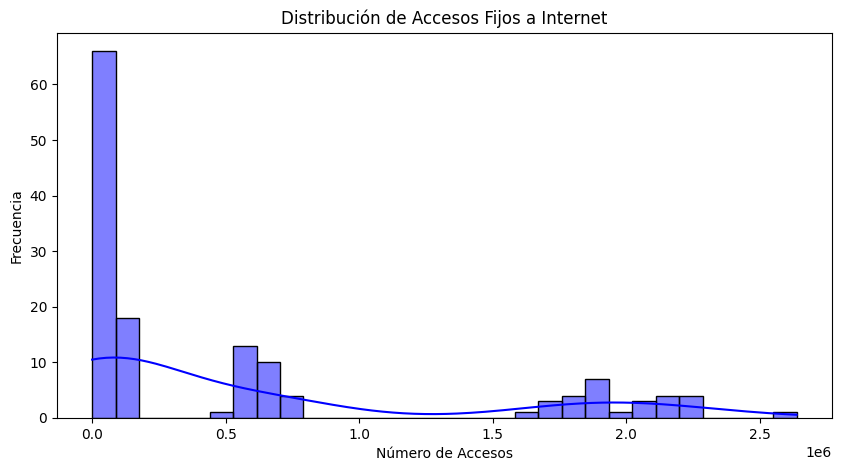

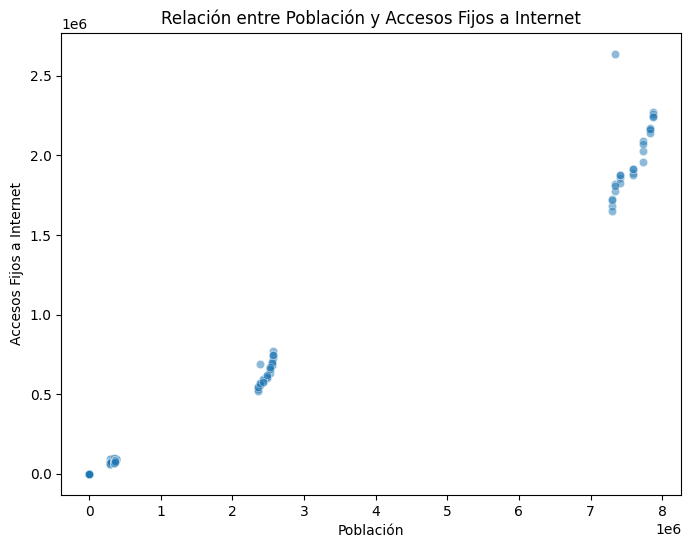

ValueError: could not convert string to float: 'ANTIOQUIA'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Transformar INDICE a flotante
internet["INDICE"] = internet["INDICE"].astype(str).str.replace(",", ".").astype(float)

# Eliminar atributos irrelevantes
internet = internet.drop(["COD_DEPARTAMENTO", "COD_MUNICIPIO", "TRIMESTRE"], axis=1)

# Obtener estadísticas generales
estadisticas = internet.describe()

# Mostrar estadísticas
print(estadisticas)

#Conteo de Registros por Año y Departamento
print("\n📅 Distribución de Datos por Año:")
print(internet["AÑO"].value_counts())

print("\n📍 Departamentos con más registros:")
print(internet["DEPARTAMENTO"].value_counts().head(10))  # Top 10 departamentos con más datos

##Graficas

#Distribución del acceso a Internet
plt.figure(figsize=(10, 5))
sns.histplot(internet["No. ACCESOS FIJOS A INTERNET"], bins=30, kde=True, color="blue")
plt.title("Distribución de Accesos Fijos a Internet")
plt.xlabel("Número de Accesos")
plt.ylabel("Frecuencia")
plt.show()

#Relación entre Población y Accesos Fijos a Internet
plt.figure(figsize=(8, 6))
sns.scatterplot(x=internet["POBLACIÓN DANE"], y=internet["No. ACCESOS FIJOS A INTERNET"], alpha=0.5)
plt.title("Relación entre Población y Accesos Fijos a Internet")
plt.xlabel("Población")
plt.ylabel("Accesos Fijos a Internet")
plt.show()

#Mapa de Calor de Correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(internet.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()




* Los datos sobre la penetración de internet fijo en los municipios seleccionados no contienen valores faltantes, lo que indica una alta calidad en su registro. No obstante, es esencial aplicar herramientas estadísticas y visualizaciones gráficas para analizar su comportamiento y tendencia, garantizando así su calidad.
---

### **📝 Calidad de Datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = internet.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos)

In [ ]:
#Calcular el porcentaje de campos vacios por columna
cantidad_registros = internet.shape[0]
print("Cantidad de registros: ", internet.shape[0])
Porcentaje = cantidad_nulos/cantidad_registros*100
print("Porcentaje de campos vacios por columna: \n", Porcentaje)

---
## **Educación por Municipio**

### 📚Descripción general del contenido de los conjuntos de datos  }
- Los conjuntos de datos contienen información estadística sobre educación en los niveles preescolar, básica y media en municipios de Colombia, desde 2011 hasta 2023, excluyendo valores atípicos. Incluyen indicadores sectoriales clave, como tasas de cobertura bruta y neta, calculadas con proyecciones del Censo 2018 para 2018 y 2019. Los valores están en formato decimal en la base de datos, pero se exportan multiplicados por 100 para expresarlos como porcentajes.

In [ ]:
# Mostrar las primeras filas del dataset
display(educacion.head())

# Mostrar la cantidad de filas y columnas
educacion.shape

### **📌 Compresión de los Atributos del Dataset**
## 📅 Datos Generales
- **AÑO** (`a_o`): Representa el año en el que se registraron los datos.
- **CÓDIGO_MUNICIPIO** (`c_digo_municipio`): Código DANE del municipio.
- **MUNICIPIO** (`municipio`): Nombre del municipio.
- **CÓDIGO_DEPARTAMENTO** (`c_digo_departamento`): Código DANE del departamento.
- **DEPARTAMENTO** (`departamento`): Nombre del departamento.
- **CÓDIGO_ETC** (`c_digo_etc`): Código DANE de la ETC.
- **ETC** (`etc`): Nombre de la ETC.

## 🌍 Demografía Educativa
- **POBLACIÓN_5_16** (`poblaci_n_5_16`): Población en edad teórica de estudiar (5 a 16 años) según proyecciones del DANE.
- **TASA_MATRICULACIÓN_5_16** (`tasa_matriculaci_n_5_16`): Proporción de la población entre 5 y 16 años que asiste al sistema educativo. Puede ser mayor al 100% por flujos migratorios.

## 📊 Cobertura Educativa
- **COBERTURA_NETA** (`cobertura_neta`): Relación entre estudiantes matriculados en transición, primaria, secundaria y media con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_TRANSICIÓN** (`cobertura_neta_transici_n`): Relación entre estudiantes matriculados en transición con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_PRIMARIA** (`cobertura_neta_primaria`): Relación entre estudiantes matriculados en primaria con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_SECUNDARIA** (`cobertura_neta_secundaria`): Relación entre estudiantes matriculados en secundaria con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_MEDIA** (`cobertura_neta_media`): Relación entre estudiantes matriculados en media con edad teórica y la población total correspondiente.
- **COBERTURA_BRUTA** (`cobertura_bruta`): Relación entre estudiantes matriculados en transición, primaria, secundaria y media y la población en edad teórica para estos niveles.

## 🏫 Calidad y Infraestructura Educativa
- **TAMAÑO_PROMEDIO_DE_GRUPO** (`tama_o_promedio_de_grupo`): Número promedio de estudiantes por grupo considerando el sector oficial y no oficial.
- **SEDES_CONECTADAS_A_INTERNET** (`sedes_conectadas_a_internet`): Porcentaje de sedes oficiales de una Entidad Territorial Certificada conectadas a internet.

## 📉 Indicadores de Desempeño Académico
- **DESERCIÓN** (`deserci_n`): Tasa de deserción intraanual del sector oficial, indica alumnos que abandonan estudios durante el año.
- **APROBACIÓN** (`aprobaci_n`): Tasa de aprobación de estudiantes del sector oficial en educación preescolar, básica y media.
- **REPROBACIÓN** (`reprobaci_n`): Tasa de reprobación de estudiantes del sector oficial en educación preescolar, básica y media.
- **REPITENCIA** (`repitencia`): Tasa de repitencia del sector oficial, porcentaje de alumnos que repiten grado del año anterior.

### **🔢 Tipos de Datos 🔠**

In [ ]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(educacion.dtypes)

### **📊 Analisis Estadístico y Gráficos**

In [ ]:
# Obtener estadísticas generales
estadisticas = educacion.describe()

# Mostrar estadísticas
print(estadisticas)

#Conteo de Municipios y Departamentos
print("\n📍 Número de Municipios por Departamento:")
print(dataset["DEPARTAMENTO"].value_counts().head(10))

print("\n🏫 Número de ETCs por Departamento:")
print(dataset["ETC"].value_counts().head(10))


##graficas
#Distribución de la Tasa de Matriculación (5-16 años)
plt.figure(figsize=(10, 5))
sns.histplot(dataset["TASA_MATRICULACIÓN_5_16"], bins=30, kde=True, color="green")
plt.title("Distribución de la Tasa de Matriculación (5-16 años)")
plt.xlabel("Tasa de Matriculación (%)")
plt.ylabel("Frecuencia")
plt.show()

#Boxplot de Cobertura Neta por Nivel Educativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset[["COBERTURA_NETA_TRANSICIÓN", "COBERTURA_NETA_PRIMARIA",
                          "COBERTURA_NETA_SECUNDARIA", "COBERTURA_NETA_MEDIA"]])
plt.title("Distribución de la Cobertura Neta por Nivel Educativo")
plt.ylabel("Cobertura (%)")
plt.show()

#Relación entre Deserción y Reprobación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset["DESERCIÓN"], y=dataset["REPROBACIÓN"], alpha=0.5)
plt.title("Relación entre Deserción y Reprobación")
plt.xlabel("Deserción (%)")
plt.ylabel("Reprobación (%)")
plt.show()

#Mapa de Calor de Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()



### **📝 Calidad de Datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = educacion.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos)

In [ ]:
#Calcular el porcentaje de campos vacios por columna
cantidad_registros = educacion.shape[0]
print("Cantidad de registros: ", internet.shape[0])
Porcentaje = cantidad_nulos/cantidad_registros*100
print("Porcentaje de campos vacios por columna: \n", Porcentaje)

La metadata del atributo "repitencia" corresponde al porcentaje de alumnos matriculados en un año escolar en transición, primaria, secundaria y media que se encuentran repitiendo el mismo grado cursado el año anterior. Sin embargo, este dato no corresponde a un porcentaje sino un número entero.

---
## **Matrícula por Nivel Educativo**

### 📚Descripción general del contenido de los conjuntos de datos  
- Los conjuntos de datos contienen información detallada sobre la Matrícula Estadística de Educación Superior en Colombia, desagregada por nivel de formación (técnico, tecnológico, universitario, posgrados, entre otros) y por municipio. Estos datos permiten analizar la evolución de la matrícula a lo largo del tiempo, identificar tendencias en el acceso a la educación superior y comparar la distribución de estudiantes en diferentes regiones. Además, facilitan estudios sobre cobertura, crecimiento del sector educativo y planificación de políticas públicas para mejorar el acceso y la calidad de la educación superior en el país.

In [ ]:
# Mostrar las primeras filas del dataset
display(matriculas.head())

# Mostrar la cantidad de filas y columnas
matriculas.shape

### **📌 Compresión de los Atributos del Dataset**

## 📅 Datos Generales
- **AÑO** (`a_o`): Número que representa el año en el que se registraron los datos.

## 🗺️ Ubicación Geográfica
- **Código del Departamento** (`c_digo_deldepartamento`): Texto que identifica el código del departamento según la clasificación oficial.
- **Nombre del Departamento** (`nombre_del_departamento`): Texto que contiene el nombre del departamento.

- **Código del Municipio** (`c_digo_delmunicipio`): Texto que asigna el código único de cada municipio.
- **Nombre del Municipio** (`nombre_del_municipio`): Texto que contiene el nombre del municipio.

## 🎓 Educación Superior
- **TÉCNICA PROFESIONAL** (`tecnica_profesional`): Número que indica la cantidad de programas académicos de nivel técnico profesional en el municipio.
- **TECNOLOGICA** (`tecnologica`): Número que indica la cantidad de programas académicos de nivel tecnológico en el municipio.
- **UNIVERSITARIA** (`universitaria`): Número que indica la cantidad de programas académicos de nivel universitario en el municipio.
- **ESPECIALIZACION** (`especializacion`): Número que indica la cantidad de programas académicos de especialización en el municipio.
- **MAESTRÍA** (`maestria`): Número que indica la cantidad de programas académicos de maestría en el municipio.
- **DOCTORADO** (`doctorado`): Número que indica la cantidad de programas académicos de doctorado en el municipio.
- **IES CON OFERTA** (`ies_con_oferta`): Número de Instituciones de Educación Superior (IES) con oferta de programas académicos en el municipio.

### **🔢 Tipos de Datos 🔠**

In [ ]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(matriculas.dtypes)

### **📊 Analisis Estadístico y Gráficos**

In [ ]:
# Obtener estadísticas generales
estadisticas = matriculas.describe()

# Mostrar estadísticas
print(estadisticas)

##graficas
#Distribución de Programas Académicos por Nivel
plt.figure(figsize=(10, 5))
dataset[["tecnica_profesional", "tecnologica", "universitaria",
         "especializacion", "maestria", "doctorado"]].sum().plot(kind='bar', color=["blue", "green", "orange", "purple", "red", "brown"])
plt.title("Total de Programas Académicos por Nivel en Colombia")
plt.ylabel("Cantidad de Programas")
plt.xticks(rotation=45)
plt.show()

#Mapa de Calor de Correlaciones entre Tipos de Programas
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[["tecnica_profesional", "tecnologica", "universitaria",
                     "especializacion", "maestria", "doctorado", "ies_con_oferta"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones entre Tipos de Programas")
plt.show()

#Distribución de Universidades por Departamento
plt.figure(figsize=(12, 6))
top_departamentos = dataset.groupby("nombre_del_departamento")["ies_con_oferta"].sum().sort_values(ascending=False).head(10)
top_departamentos.plot(kind="bar", color="blue")
plt.title("Top 10 Departamentos con Más Instituciones de Educación Superior")
plt.ylabel("Cantidad de IES")
plt.xticks(rotation=45)
plt.show()

#Comparación de Programas Universitarios vs. Tecnológicos
t.figure(figsize=(8, 6))
sns.scatterplot(x=dataset["universitaria"], y=dataset["tecnologica"], alpha=0.5)
plt.title("Relación entre Programas Universitarios y Tecnológicos")
plt.xlabel("Programas Universitarios")
plt.ylabel("Programas Tecnológicos")
plt.show()



### **📝 Calidad de Datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = matriculas.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos)

---
## **Índice de Pobreza de Hogares por Persona**

### 📚Descripción general del contenido de los conjuntos de datos
- Los conjuntos de datos contienen información detallada sobre diversos aspectos sociodemográficos, educativos, laborales y de salud de la población en Colombia. Incluyen variables clave como **identificadores únicos** (directorio, secuencia de encuesta, orden), características personales (**edad, alfabetización, nivel educativo alcanzado, matrícula actual**), condiciones de salud (**afiliación a seguridad social, acceso a servicios médicos, alimentación escolar**), y aspectos laborales (**ocupación principal, búsqueda de empleo, cotización a pensiones**). Esta información permite realizar análisis sobre la cobertura educativa, acceso a servicios de salud, condiciones laborales y bienestar social, facilitando la toma de decisiones y la formulación de políticas públicas.

In [ ]:
# Mostrar las primeras filas del dataset
display(pobreza.head())

# Mostrar la cantidad de filas y columnas
pobreza.shape

### **📌 Compresión de los Atributos del Dataset**
## 📂 Identificación y Secuencia
- **DIRECTORIO** (`directorio`): Identificador del directorio de la encuesta.  
- **SECUENCIA_ENCUESTA** (`secuencia_encuesta`): Número de secuencia de la encuesta.  
- **SECUENCIA_P** (`secuencia_p`): Número de secuencia de la persona dentro del hogar.  
- **ORDEN** (`orden`): Orden de la persona en la encuesta.  

## 👤 Información Demográfica
- **P6020** (`P6020`): Género de la persona.  
- **P6040** (`P6040`): ¿Cuántos años cumplidos tiene?  
- **FEX_C** (`fex_c`): Factor de expansión de la encuesta.  

## 🏥 Salud
- **P6051** (`P6051`): Estado de salud general.  
- **P6090** (`P6090`): ¿Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud? (EPS o ARS - Sisben).  
- **P5665** (`P5665`): En los últimos 30 días, ¿tuvo alguna enfermedad, accidente, problema odontológico u otro problema de salud que no haya implicado hospitalización?  
- **P8563** (`P8563`): Para tratar ese problema de salud, ¿qué hizo principalmente?  

## 🏠 Condiciones de Vida
- **P51** (`P51`): ¿Dónde o con quién permanece la mayor parte del tiempo entre semana?  
- **P55** (`P55`): ¿Recibe o toma desayuno o almuerzo en el lugar donde permanece la mayor parte del tiempo entre semana?  
- **P774** (`P774`): ¿Quién paga por esta alimentación?  

## 📖 Educación
- **P6160** (`P6160`): ¿Sabe leer y escribir?  
- **P8586** (`P8586`): ¿Actualmente estudia? (Asiste al preescolar, escuela, colegio o universidad).  
- **P8587** (`P8587`): ¿Cuál es el nivel educativo más alto alcanzado y el último año o grado aprobado en este nivel?  
- **P8587S1** (`P8587S1`): Grado o año aprobado.  
- **P1088** (`P1088`): ¿En qué nivel está matriculado y qué grado cursa?  
- **P1088S1** (`P1088S1`): Grado o año que cursa.  
- **P6180** (`P6180`): ¿Recibe en el plantel educativo alimentos en forma gratuita o por un pago simbólico?  

## 💼 Ocupación y Trabajo
- **P6240** (`P6240`): ¿En qué actividad ocupó la mayor parte del tiempo la semana pasada?  
- **P6250** (`P6250`): Además de lo anterior, ¿realizó alguna actividad paga por una hora o más?  
- **P6260** (`P6260`): Aunque no trabajó la semana pasada por una hora o más en forma remunerada, ¿tenía algún trabajo o negocio por el que recibe ingresos?  
- **P6270** (`P6270`): ¿Trabajó la semana pasada en un negocio por una hora o más sin que le pagaran?  
- **P6351** (`P6351`): Si le hubiera resultado algún trabajo, ¿estaba disponible la semana pasada para empezar a trabajar?  
- **P6390S1** (`P6390S1`): ¿A qué actividad se dedica principalmente la empresa o negocio en la que realiza su trabajo?  
- **P7250** (`P7250`): ¿Durante cuántas semanas ha estado buscando trabajo?  
- **P6920** (`P6920`): ¿Está cotizando actualmente a un fondo de pensiones?

### **🔢 Tipos de Datos 🔠**

In [ ]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(pobreza.dtypes)

### **📊 Analisis Estadístico y Gráficos**

In [ ]:
# Obtener estadísticas generales
estadisticas = pobreza.describe()

# Mostrar estadísticas
print(estadisticas)

#Distribución de Género
print("\n👥 Distribución de Género:")
print(dataset["P6020"].value_counts())

plt.figure(figsize=(6, 4))
dataset["P6020"].value_counts().plot(kind="bar", color=["blue", "pink"])
plt.title("Distribución de Género en la Encuesta")
plt.xticks(ticks=[0, 1], labels=["Hombres", "Mujeres"], rotation=0)
plt.ylabel("Frecuencia")
plt.show()

#Edad Promedio de la Población Encuestada
print("\n📅 Edad Promedio de los Encuestados:", dataset["P6040"].mean())
plt.figure(figsize=(8, 4))
sns.histplot(dataset["P6040"], bins=20, kde=True, color="green")
plt.title("Distribución de la Edad de los Encuestados")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

#Estado General de Salud
plt.figure(figsize=(8, 4))
dataset["P6051"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Estado de Salud General de los Encuestados")
plt.xlabel("Categoría de Salud")
plt.ylabel("Frecuencia")
plt.show()

#Afiliación a Seguridad Social (EPS/Sisben)
plt.figure(figsize=(6, 4))
dataset["P6090"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "red"])
plt.title("Afiliación a Seguridad Social")
plt.ylabel("")
plt.show()

#Distribución de Nivel Educativo Alcanzado
plt.figure(figsize=(10, 5))
dataset["P8587"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Nivel Educativo Más Alto Alcanzado")
plt.xlabel("Nivel Educativo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

#¿Recibe Alimentos en el Lugar Donde Permanece?
plt.figure(figsize=(6, 4))
dataset["P55"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "red"])
plt.title("Recibe Alimentos en el Lugar Donde Permanece")
plt.ylabel("")
plt.show()

#¿Dónde Permanece la Mayor Parte del Tiempo?
plt.figure(figsize=(10, 5))
dataset["P51"].value_counts().plot(kind="bar", color="brown")
plt.title("Lugar Donde Permanece la Mayor Parte del Tiempo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

#Distribución de Actividad Principal
plt.figure(figsize=(10, 5))
dataset["P6240"].value_counts().head(10).plot(kind="bar", color="blue")
plt.title("Top 10 Actividades en las que Ocuparon Más Tiempo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

#Porcentaje de Personas que Buscaron Trabajo en las Últimas Semanas
buscando_trabajo = dataset["P7250"].apply(lambda x: "Sí" if x > 0 else "No").value_counts(normalize=True) * 100
print("\n💼 Porcentaje de Personas que Buscaron Trabajo en las Últimas Semanas:")
print(buscando_trabajo)
plt.figure(figsize=(6, 4))
buscando_trabajo.plot(kind="pie", autopct="%1.1f%%", colors=["red", "gray"])
plt.title("Personas que Buscaron Trabajo en las Últimas Semanas")
plt.ylabel("")
plt.show()


### **📝 Calidad de Datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = pobreza.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos)

---
## **Ficha de Inversión Municipal en Proyectos Públicos (PP)**

### 📚Descripción general del contenido de los conjuntos de datos
- Los conjuntos de datos presentan información sobre la inversión y gestión de programas sociales del Gobierno Nacional a nivel municipal, organizados por periodos presidenciales. Incluyen detalles sobre los recursos destinados a la atención de población vulnerable y víctimas, así como las acciones implementadas para su bienestar. Además, registran las entidades que conforman el **Sector de Inclusión Social y la Reconciliación, permitiendo analizar la distribución de la inversión, el impacto de las políticas públicas y la evolución de estos programas en los distintos municipios del país.

In [ ]:
# Mostrar las primeras filas del dataset
display(inversion.head())

# Mostrar la cantidad de filas y columnas
inversion.shape

### **📌 Compresión de los Atributos del Dataset**
## 🗺️ Ubicación Geográfica
- **Código Departamento** (`codigo_departamento`): Indica el código del departamento según DIVIPOLA.  
- **Código DANE** (`codigo_dane`): Código de identificación del municipio según el DANE.  
- **Nombre Departamento** (`nombre_departamento`): Nombre del departamento donde se informa la atención.  
- **Nombre Municipio** (`nombre_municipio`): Nombre del municipio donde se informa la atención.  

## 🏠 Cobertura del Programa
- **Familias Atendidas en el Período Presidencial** (`familias_periodo_presidencial`): Cantidad de familias atendidas por el programa en el municipio indicado.  
- **Personas Atendidas en el Período Presidencial** (`personas_periodo_presidencial`): Cantidad de personas atendidas por el programa en el municipio indicado.  
- **Inversión en el Período Presidencial** (`inversion_periodo_presidencial`): Inversión realizada por el programa en el municipio indicado.  

## 🏛️ Información del Programa
- **Nombre del Período Presidencial** (`nombre_periodopresidencial`): Nombre del período presidencial atendido.  
- **Nombre del Programa de Atención** (`nombre_programa_salida`): Nombre del programa que realizó la atención.  
- **Descripción** (`descripcion`): Descripción del funcionamiento del programa.  
- **Entidad** (`entidad`): Nombre de la entidad a la cual pertenece el programa.  
- **Población Objetivo** (`poblacion_objetivo`): Indica la población a la cual está enfocada la atención.  

## 💰 Información Financiera
- **Pagos** (`pagos`): Indica la cantidad de pagos que se han realizado.  
- **Corte** (`corte`): Indica el corte con el cual se publica la información.  

### **🔢 Tipos de Datos 🔠**

In [ ]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(inversion.dtypes)

### **📊 Analisis Estadístico y Gráficos**

In [ ]:
# Obtener estadísticas generales
estadisticas = inversion.describe()

# Mostrar estadísticas
print(estadisticas)

#Cantidad de Municipios y Departamentos en el Dataset
num_departamentos = dataset["nombre_departamento"].nunique()
num_municipios = dataset["nombre_municipio"].nunique()

print(f"🏛️ Número de Departamentos: {num_departamentos}")
print(f"📍 Número de Municipios: {num_municipios}")

# Departamentos con Más Familias Atendidas
top_departamentos = dataset.groupby("nombre_departamento")["familias_periodo_presidencial"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_departamentos.plot(kind="bar", color="purple")
plt.title("Top 10 Departamentos con Más Familias Atendidas")
plt.xlabel("Departamento")
plt.ylabel("Familias Atendidas")
plt.xticks(rotation=45)
plt.show()

# Distribución de la Inversión en el Programa
plt.figure(figsize=(12, 5))
sns.histplot(dataset["inversion_periodo_presidencial"], bins=30, kde=True, color="red")
plt.title("Distribución de la Inversión por Municipio")
plt.xlabel("Inversión (en millones)")
plt.ylabel("Frecuencia")
plt.show()

#Departamentos con Mayor Inversión
top_inversion_departamentos = dataset.groupby("nombre_departamento")["inversion_periodo_presidencial"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_inversion_departamentos.plot(kind="bar", color="orange")
plt.title("Top 10 Departamentos con Mayor Inversión")
plt.xlabel("Departamento")
plt.ylabel("Inversión Total")
plt.xticks(rotation=45)
plt.show()

#Relación entre Inversión y Cantidad de Pagos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x="inversion_periodo_presidencial", y="pagos", alpha=0.5, color="darkblue")
plt.title("Relación entre Inversión y Cantidad de Pagos")
plt.xlabel("Inversión")
plt.ylabel("Cantidad de Pagos")
plt.show()


### **📝 Calidad de Datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = inversion.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos)

---
## **Resultados ICFES 11**

### 📚Descripción general del contenido de los conjuntos de datos  
- Este conjunto de datos contiene información sobre los resultados educativos de los estudiantes en Colombia, con variables relacionadas con su identificación, ubicación, características sociodemográficas y puntajes en distintas áreas evaluadas.  

- Incluye detalles sobre los colegios, asì como datos familiares y socioeconómico, el conjunto de datos incluye puntajes en inglés, matemáticas, lectura crítica, ciencias naturales y sociales, además del puntaje global obtenido en la evaluación**. Esta información permite analizar la relación entre factores sociodemográficos y el desempeño académico, facilitando estudios sobre calidad educativa y equidad en el acceso a oportunidades.

In [ ]:
# Mostrar las primeras filas del dataset
display(icfes_bogota.head())

# Mostrar la cantidad de filas y columnas
icfes_bogota.shape

### **📌 Compresión de los Atributos del Dataset**
## 📅 Información General
- **PERIODO** (`periodo`): Periodo de los resultados.  
- **ESTU_TIPODOCUMENTO** (`estu_tipodocumento`): Tipo de documento del examinando.  
- **ESTU_CONSECUTIVO** (`estu_consecutivo`): Identificador único del examinando.  

## 🏫 Información del Colegio
- **COLE_AREA_UBICACION** (`cole_area_ubicacion`): Ubicación de la sede.  
- **COLE_BILINGUE** (`cole_bilingue`): ¿Es colegio bilingüe?  
- **COLE_CALENDARIO** (`cole_calendario`): Calendario del establecimiento.  
- **COLE_CARACTER** (`cole_caracter`): Carácter del establecimiento.  
- **COLE_COD_DANE_ESTABLECIMIENTO** (`cole_cod_dane_establecimiento`): Código DANE del establecimiento.  
- **COLE_COD_DANE_SEDE** (`cole_cod_dane_sede`): Código DANE de la sede.  
- **COLE_COD_DEPTO_UBICACION** (`cole_cod_depto_ubicacion`): Departamento de la sede.  
- **COLE_COD_MCPIO_UBICACION** (`cole_cod_mcpio_ubicacion`): Código del municipio de la sede.  
- **COLE_CODIGO_ICFES** (`cole_codigo_icfes`): Código ICFES del establecimiento.  
- **COLE_DEPTO_UBICACION** (`cole_depto_ubicacion`): Departamento de la sede.  
- **COLE_GENERO** (`cole_genero`): Género del establecimiento.  
- **COLE_JORNADA** (`cole_jornada`): Jornada de la sede.  
- **COLE_MCPIO_UBICACION** (`cole_mcpio_ubicacion`): Municipio de la sede.  
- **COLE_NATURALEZA** (`cole_naturaleza`): Naturaleza del establecimiento.  
- **COLE_NOMBRE_ESTABLECIMIENTO** (`cole_nombre_establecimiento`): Nombre del establecimiento.  
- **COLE_NOMBRE_SEDE** (`cole_nombre_sede`): Nombre de la sede.  
- **COLE_SEDE_PRINCIPAL** (`cole_sede_principal`): ¿Es la sede principal?  

## 📍 Ubicación del Examen y Residencia
- **ESTU_COD_DEPTO_PRESENTACION** (`estu_cod_depto_presentacion`): Código del departamento de presentación del examen.  
- **ESTU_COD_MCPIO_PRESENTACION** (`estu_cod_mcpio_presentacion`): Código del municipio de presentación del examen.  
- **ESTU_COD_RESIDE_DEPTO** (`estu_cod_reside_depto`): Código del departamento de residencia del examinando.  
- **ESTU_COD_RESIDE_MCPIO** (`estu_cod_reside_mcpio`): Código del municipio de residencia del examinando.  
- **ESTU_DEPTO_PRESENTACION** (`estu_depto_presentacion`): Departamento de presentación del examen.  
- **ESTU_DEPTO_RESIDE** (`estu_depto_reside`): Departamento de residencia del examinando.  
- **ESTU_MCPIO_PRESENTACION** (`estu_mcpio_presentacion`): Municipio de presentación del examen.  
- **ESTU_MCPIO_RESIDE** (`estu_mcpio_reside`): Municipio de residencia del examinando.  

## 👤 Información del Examinando
- **ESTU_ESTADOINVESTIGACION** (`estu_estadoinvestigacion`): ¿Permite usar sus datos para investigaciones?  
- **ESTU_ESTUDIANTE** (`estu_estudiante`): "S" si es estudiante o "N" si es individual.  
- **ESTU_FECHANACIMIENTO** (`estu_fechanacimiento`): Fecha de nacimiento del examinando.  
- **ESTU_GENERO** (`estu_genero`): Género del examinando.  
- **ESTU_NACIONALIDAD** (`estu_nacionalidad`): Nacionalidad del examinando.  
- **ESTU_PAIS_RESIDE** (`estu_pais_reside`): País de residencia del examinando.  
- **ESTU_PRIVADO_LIBERTAD** (`estu_privado_libertad`): ¿Es privado de la libertad?  

## 🏠 Información del Hogar
- **FAMI_CUARTOSHOGAR** (`fami_cuartoshogar`): ¿Cuántos cuartos tiene su hogar?  
- **FAMI_EDUCACIONMADRE** (`fami_educacionmadre`): Nivel de estudios de la madre.  
- **FAMI_EDUCACIONPADRE** (`fami_educacionpadre`): Nivel de estudios del padre.  
- **FAMI_ESTRATOVIVIENDA** (`fami_estratovivienda`): Estrato del examinando.  
- **FAMI_PERSONASHOGAR** (`fami_personashogar`): ¿Con cuántas personas vive?  
- **FAMI_TIENEAUTOMOVIL** (`fami_tieneautomovil`): ¿Tiene automóvil?  
- **FAMI_TIENECOMPUTADOR** (`fami_tienecomputador`): ¿Tiene computador?  
- **FAMI_TIENEINTERNET** (`fami_tieneinternet`): ¿Tiene internet?  
- **FAMI_TIENELAVADORA** (`fami_tienelavadora`): ¿Tiene lavadora?  

## 📊 Resultados del Examen
- **DESEMP_INGLES** (`desemp_ingles`): Desempeño en inglés.  
- **PUNT_INGLES** (`punt_ingles`): Puntaje en inglés.  
- **PUNT_MATEMATICAS** (`punt_matematicas`): Puntaje en matemáticas.  
- **PUNT_SOCIALES_CIUDADANAS** (`punt_sociales_ciudadanas`): Puntaje en sociales y ciudadanas.  
- **PUNT_C_NATURALES** (`punt_c_naturales`): Puntaje en ciencias naturales.  
- **PUNT_LECTURA_CRITICA** (`punt_lectura_critica`): Puntaje en lectura crítica.  
- **PUNT_GLOBAL** (`punt_global`): Puntaje global.  

### **🔢 Tipos de Datos 🔠**

In [ ]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(icfes_bogota.dtypes)

### **📊 Analisis Estadístico y Gráficos**

In [ ]:
# Obtener estadísticas generales
estadisticas = icfes_bogota.describe()
# Mostrar estadísticas
print(estadisticas)

            PERIODO  COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
count  1.131725e+06                   1.130014e+06        1.131725e+06   
mean   2.015747e+04                   2.079474e+11        2.075627e+11   
std    3.899695e+01                   1.001486e+11        1.005423e+11   
min    2.010100e+04                   1.110011e+10        0.000000e+00   
25%    2.012200e+04                   1.110010e+11        1.110010e+11   
50%    2.015200e+04                   1.118480e+11        1.118480e+11   
75%    2.019400e+04                   3.110011e+11        3.110011e+11   
max    2.022400e+04                   4.118480e+11        5.110001e+11   

       COLE_COD_DEPTO_UBICACION  COLE_COD_MCPIO_UBICACION  COLE_CODIGO_ICFES  \
count                 1131725.0                 1131725.0       1.126026e+06   
mean                       11.0                   11001.0       1.165432e+05   
std                         0.0                       0.0       1.482942e+05   
min          

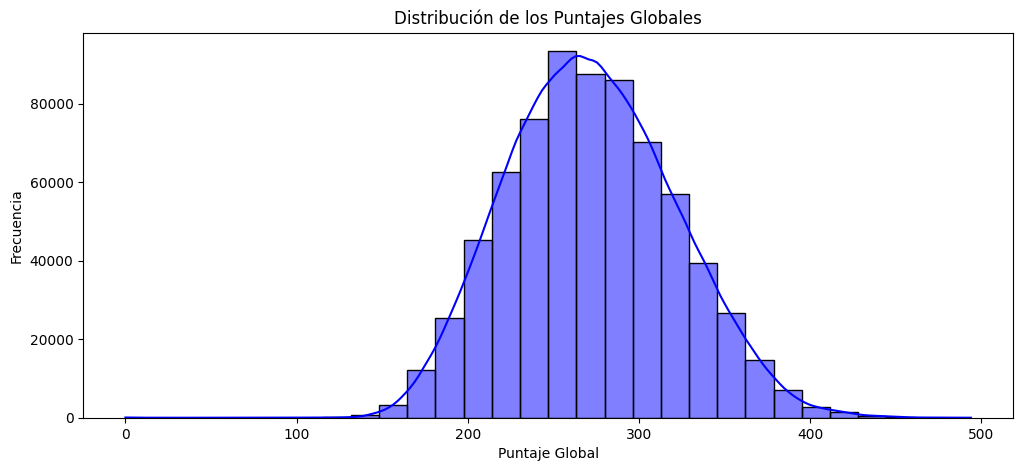

In [ ]:
#Distribución de los Puntajes Globales ##cambiar nombres de dataset para corroborar
dataset=icfes_bogota
plt.figure(figsize=(12, 5))
sns.histplot(dataset["PUNT_GLOBAL"], bins=30, kde=True, color="blue")
plt.title("Distribución de los Puntajes Globales")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

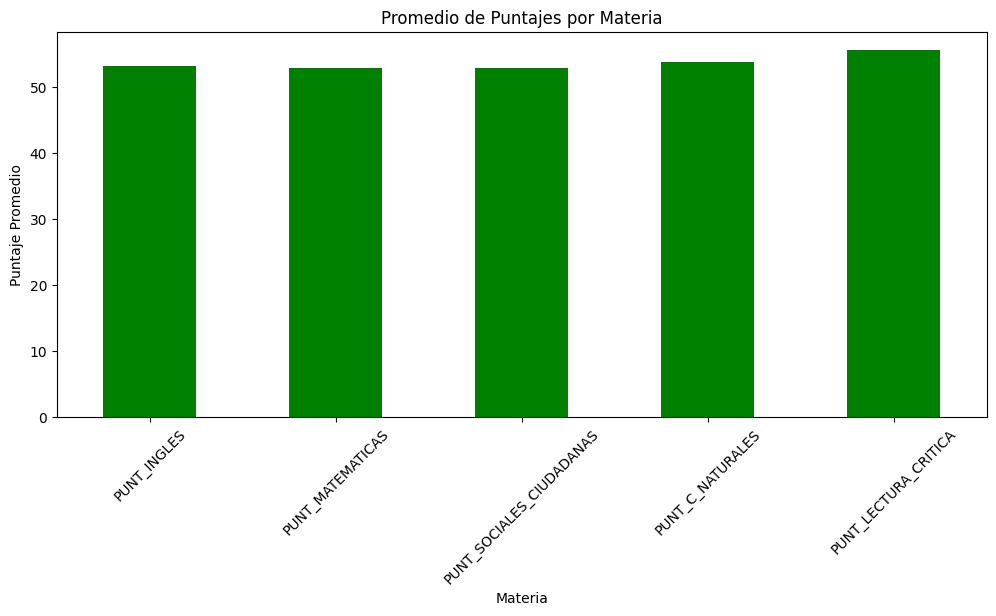

In [ ]:
#Promedio de Puntajes por Materia
promedios = dataset[["PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS",
                     "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA"]].mean()
plt.figure(figsize=(12, 5))
promedios.plot(kind="bar", color="green")
plt.title("Promedio de Puntajes por Materia")
plt.xlabel("Materia")
plt.ylabel("Puntaje Promedio")
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-ce8a1e91ac3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", palette="coolwarm")


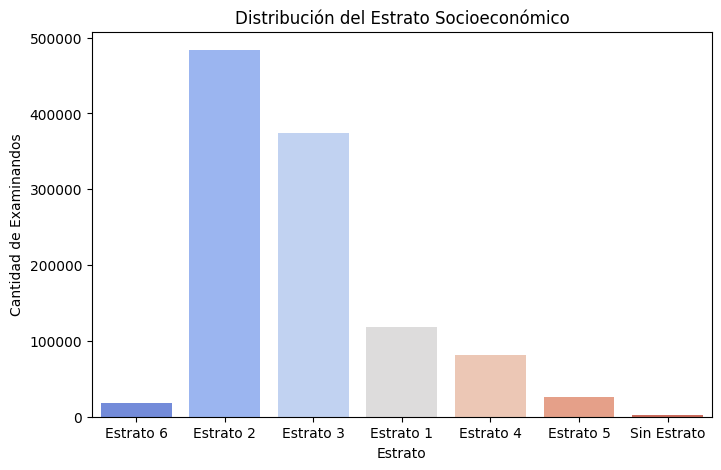

In [ ]:
#Distribución del Estrato Socioeconómico de los Examinandos
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", palette="coolwarm")
plt.title("Distribución del Estrato Socioeconómico")
plt.xlabel("Estrato")
plt.ylabel("Cantidad de Examinandos")
plt.show()

<ipython-input-15-43b7b06a7d8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", palette="coolwarm")


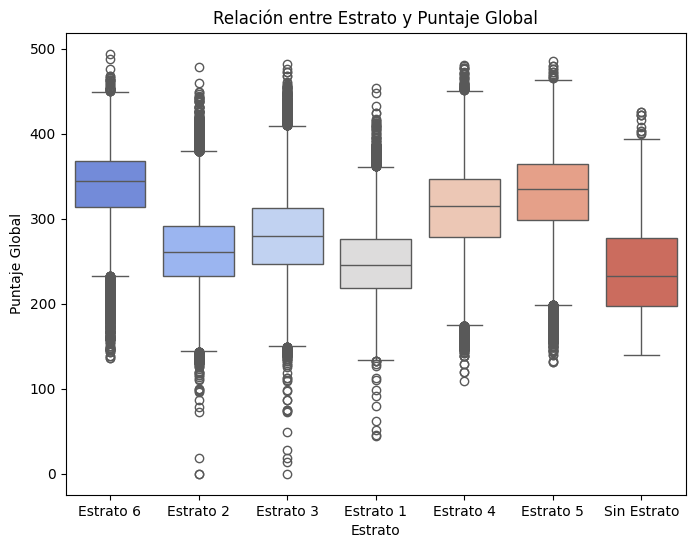

In [ ]:
#Relación entre el Estrato y el Puntaje Global
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", palette="coolwarm")
plt.title("Relación entre Estrato y Puntaje Global")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")
plt.show()

<ipython-input-16-eed6afb78e3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="ESTU_GENERO", y="PUNT_GLOBAL", palette="muted")


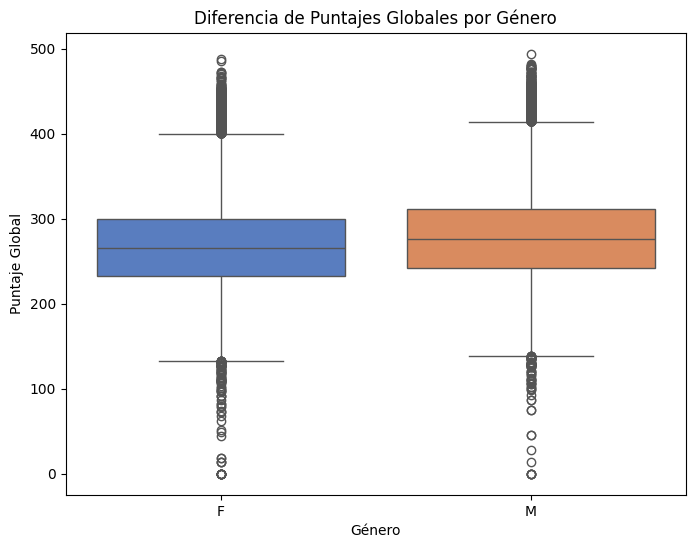

In [ ]:
#Diferencia de Puntajes por Género
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="ESTU_GENERO", y="PUNT_GLOBAL", palette="muted")
plt.title("Diferencia de Puntajes Globales por Género")
plt.xlabel("Género")
plt.ylabel("Puntaje Global")
plt.show()

### **📝 Calidad de Datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = icfes_bogota.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos)

Cantidad de campos vacios en cada columna: 
 PERIODO                               0
ESTU_TIPODOCUMENTO                    0
ESTU_CONSECUTIVO                      0
COLE_AREA_UBICACION                1790
COLE_BILINGUE                    151494
COLE_CALENDARIO                     371
COLE_CARACTER                     22188
COLE_COD_DANE_ESTABLECIMIENTO      1711
COLE_COD_DANE_SEDE                    0
COLE_COD_DEPTO_UBICACION              0
COLE_COD_MCPIO_UBICACION              0
COLE_CODIGO_ICFES                  5699
COLE_DEPTO_UBICACION                  0
COLE_GENERO                           0
COLE_JORNADA                          0
COLE_MCPIO_UBICACION                  0
COLE_NATURALEZA                       0
COLE_NOMBRE_ESTABLECIMIENTO           0
COLE_NOMBRE_SEDE                      0
COLE_SEDE_PRINCIPAL                   0
ESTU_COD_DEPTO_PRESENTACION           3
ESTU_COD_MCPIO_PRESENTACION           3
ESTU_COD_RESIDE_DEPTO              8511
ESTU_COD_RESIDE_MCPIO              

In [ ]:
#Calcular el porcentaje de campos vacios por columna
cantidad_registros = icfes_bogota.shape[0]
print("Cantidad de registros: ", internet.shape[0])
Porcentaje = cantidad_nulos/cantidad_registros*100
print("Porcentaje de campos vacios por columna: \n", Porcentaje)

Cantidad de registros:  140
Porcentaje de campos vacios por columna: 
 PERIODO                           0.000000
ESTU_TIPODOCUMENTO                0.000000
ESTU_CONSECUTIVO                  0.000000
COLE_AREA_UBICACION               0.158166
COLE_BILINGUE                    13.386114
COLE_CALENDARIO                   0.032782
COLE_CARACTER                     1.960547
COLE_COD_DANE_ESTABLECIMIENTO     0.151185
COLE_COD_DANE_SEDE                0.000000
COLE_COD_DEPTO_UBICACION          0.000000
COLE_COD_MCPIO_UBICACION          0.000000
COLE_CODIGO_ICFES                 0.503568
COLE_DEPTO_UBICACION              0.000000
COLE_GENERO                       0.000000
COLE_JORNADA                      0.000000
COLE_MCPIO_UBICACION              0.000000
COLE_NATURALEZA                   0.000000
COLE_NOMBRE_ESTABLECIMIENTO       0.000000
COLE_NOMBRE_SEDE                  0.000000
COLE_SEDE_PRINCIPAL               0.000000
ESTU_COD_DEPTO_PRESENTACION       0.000265
ESTU_COD_MCPIO_PRESENTACIO

---
## **Filtros Limpieza y transformación inicial**

En esta sección, se realizará un proceso de limpieza, filtrado y transformación inicial sobre los diferentes conjuntos de datos utilizados en el análisis. El objetivo principal es garantizar la calidad de los datos eliminando inconsistencias, manejando valores nulos y eliminando valores atípicos que puedan afectar los análisis posteriores.

Para ello, se aplicarán los siguientes pasos en cada uno de los nueve conjuntos de datos:

**Manejo de valores nulos:**



*   Se identificará el porcentaje de valores faltantes en cada variable.

*   Se eliminarán columnas con más del 35% de valores nulos, ya que pueden afectar la calidad del análisis.

*  Se imputarán los valores faltantes de las variables numéricas utilizando la media de la columna.

*   Se imputarán los valores faltantes de las variables categóricas utilizando la moda (valor más frecuente).


**Eliminación de valores atípicos**


*   Se analizará la distribución de los valores en cada variable numérica.

*    Se utilizará el método del rango intercuartílico (IQR) para detectar valores extremos y eliminarlos, reduciendo el impacto de datos anómalos en el análisis.







### **Conjunto de datos `Icfes_bogota`**

**Limpieza de datos**

In [ ]:
# 1. Manejo de valores nulos
df1=icfes_bogota
# Columnas con más del 35% de valores nulos que se eliminarán
cols_to_drop = ["PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"]
df1.drop(columns=cols_to_drop, inplace=True)

# Imputación de valores numéricos con la media
df1.fillna(df1.mean(numeric_only=True), inplace=True)

# Imputación de valores categóricos con la moda
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

# 2. Detección y eliminación de valores atípicos (usando IQR)
numeric_cols = df1.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

# Guardar el dataset limpio
icfes_bogota_limpio=df1

KeyError: "['PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL'] not found in axis"

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos1 = icfes_bogota_limpio.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos1)

Cantidad de campos vacios en cada columna: 
 PERIODO                          0
ESTU_TIPODOCUMENTO               0
ESTU_CONSECUTIVO                 0
COLE_AREA_UBICACION              0
COLE_BILINGUE                    0
COLE_CALENDARIO                  0
COLE_CARACTER                    0
COLE_COD_DANE_ESTABLECIMIENTO    0
COLE_COD_DANE_SEDE               0
COLE_COD_DEPTO_UBICACION         0
COLE_COD_MCPIO_UBICACION         0
COLE_CODIGO_ICFES                0
COLE_DEPTO_UBICACION             0
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
COLE_NATURALEZA                  0
COLE_NOMBRE_ESTABLECIMIENTO      0
COLE_NOMBRE_SEDE                 0
COLE_SEDE_PRINCIPAL              0
ESTU_COD_DEPTO_PRESENTACION      0
ESTU_COD_MCPIO_PRESENTACION      0
ESTU_COD_RESIDE_DEPTO            0
ESTU_COD_RESIDE_MCPIO            0
ESTU_DEPTO_PRESENTACION          0
ESTU_DEPTO_RESIDE                0
ESTU_ESTADOINVESTIGACION         0
ESTU_ESTUD

In [ ]:
icfes_bogota_limpio.shape

(1000792, 47)

En el dataset de resultados de ICFES Bogotá, se identificaron valores nulos en varias variables, algunas con más del 35% de datos faltantes. Se eliminaron las columnas "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA" y "PUNT_GLOBAL", ya que el alto porcentaje de valores nulos afectaría la calidad del análisis. Para las demás variables, los valores faltantes numéricos fueron imputados con la media, mientras que los categóricos fueron reemplazados con la moda. Además, se aplicó el método IQR para eliminar valores atípicos en las variables numéricas, mejorando así la representatividad del conjunto de datos.

### **Conjunto de datos `Icfes_medellin`**

**Limpieza de datos**

In [ ]:
# Ver las primeras filas
print(icfes_medellin.head())

# Ver información general (tipos de datos, valores nulos, etc.)
print(icfes_medellin.info())

# Ver cuántos valores nulos hay por columna
print(icfes_medellin.isnull().sum())

# Ver duplicados
print(f"Duplicados: {icfes_medellin.duplicated().sum()}")

icfes_medellin_viejo = icfes_medellin


   PERIODO ESTU_TIPODOCUMENTO  ESTU_CONSECUTIVO COLE_AREA_UBICACION  \
0    20172                 TI  SB11201720518410              URBANO   
1    20162                 TI  SB11201620355612              URBANO   
2    20122                 TI  SB11201220572895              URBANO   
3    20122                 TI  SB11201220106839              URBANO   
4    20152                 CC  SB11201520202169              URBANO   

  COLE_BILINGUE COLE_CALENDARIO      COLE_CARACTER  \
0             N               A  TÉCNICO/ACADÉMICO   
1             N               A            TÉCNICO   
2             N               A          ACADÉMICO   
3             N               A  TÉCNICO/ACADÉMICO   
4             N            OTRO          ACADÉMICO   

   COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
0                   405001016946        405001016946   
1                   305001004811        305001004811   
2                   105001000141        105001000141   
3                   1050

In [ ]:
# 1. Eliminar filas con valores nulos
icfes_medellin.dropna(inplace=True)

# 2. Convertir las columnas de puntajes a tipo float (por si tienen valores erróneos)
cols_numericas = [
    "PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"
]
icfes_medellin[cols_numericas] = icfes_medellin[cols_numericas].apply(pd.to_numeric, errors="coerce")

# 3. Filtrar valores fuera de los rangos esperados
icfes_medellin = icfes_medellin[
    (icfes_medellin["PUNT_INGLES"].between(0, 100)) &
    (icfes_medellin["PUNT_MATEMATICAS"].between(0, 100)) &
    (icfes_medellin["PUNT_SOCIALES_CIUDADANAS"].between(0, 100)) &
    (icfes_medellin["PUNT_C_NATURALES"].between(0, 100)) &
    (icfes_medellin["PUNT_LECTURA_CRITICA"].between(0, 100)) &
    (icfes_medellin["PUNT_GLOBAL"].between(0, 500))
]

# 4. Verificar cambios
print(icfes_medellin.info())
print(icfes_medellin.isnull().sum())
print(f"Duplicados: {icfes_medellin.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
Index: 194662 entries, 0 to 450741
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PERIODO                        194662 non-null  int64  
 1   ESTU_TIPODOCUMENTO             194662 non-null  object 
 2   ESTU_CONSECUTIVO               194662 non-null  object 
 3   COLE_AREA_UBICACION            194662 non-null  object 
 4   COLE_BILINGUE                  194662 non-null  object 
 5   COLE_CALENDARIO                194662 non-null  object 
 6   COLE_CARACTER                  194662 non-null  object 
 7   COLE_COD_DANE_ESTABLECIMIENTO  194662 non-null  int64  
 8   COLE_COD_DANE_SEDE             194662 non-null  int64  
 9   COLE_COD_DEPTO_UBICACION       194662 non-null  int64  
 10  COLE_COD_MCPIO_UBICACION       194662 non-null  int64  
 11  COLE_CODIGO_ICFES              194662 non-null  float64
 12  COLE_DEPTO_UBICACION           1946

<ipython-input-24-d7b868567f70>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-24-d7b868567f70>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


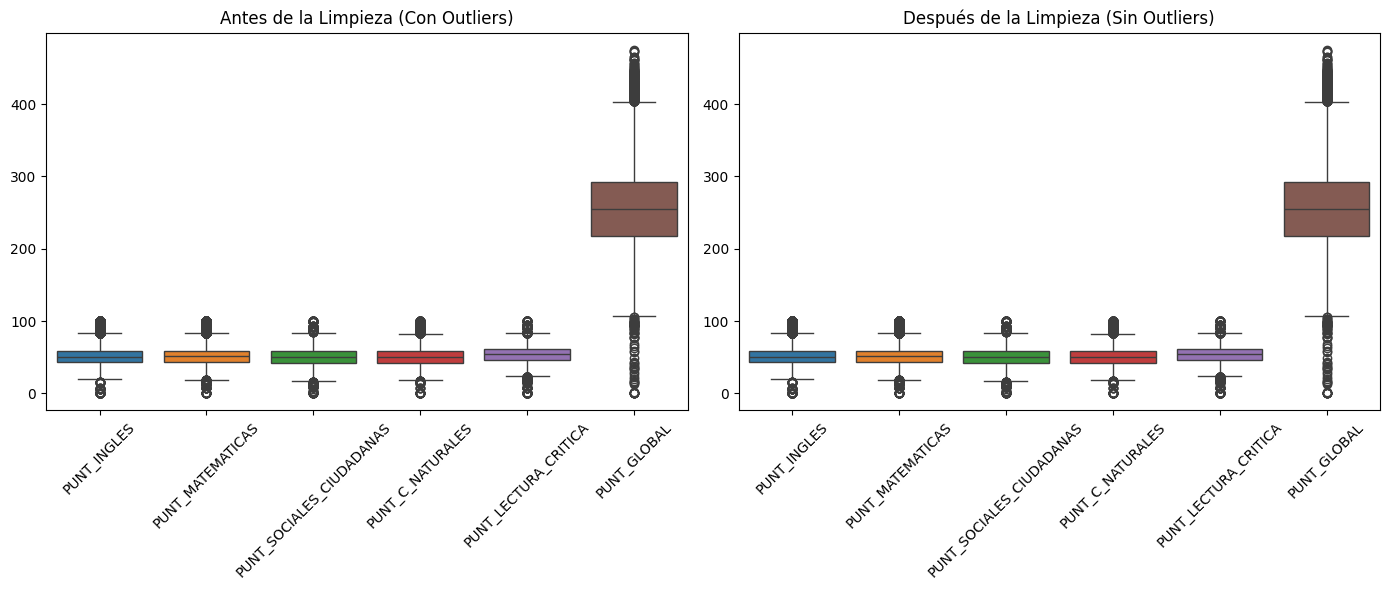

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos gráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset original sin limpiar
sns.boxplot(data=icfes_medellin_viejo[cols_numericas], ax=axes[0])
axes[0].set_title("Antes de la Limpieza (Con Outliers)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Dataset limpio sin valores atípicos
sns.boxplot(data=icfes_medellin[cols_numericas], ax=axes[1])
axes[1].set_title("Después de la Limpieza (Sin Outliers)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

En general el dataset estaba bastante limpio, sin embargo tenia muchos valores nulos necesarios para el desarrollo del proyecto

### **Conjunto de datos `Icfes_neiva`**

**Limpieza de datos**

In [ ]:
# Ver las primeras filas
print(icfes_neiva.head())

# Ver información general (tipos de datos, valores nulos, etc.)
print(icfes_neiva.info())

# Ver cuántos valores nulos hay por columna
print(icfes_neiva.isnull().sum())

# Ver duplicados
print(f"Duplicados: {icfes_neiva.duplicated().sum()}")

icfes_neiva_viejo = icfes_neiva


In [ ]:

# Verificar información inicial
info_neiva = icfes_neiva.info()
nulos_neiva = icfes_neiva.isnull().sum()
duplicados_neiva = icfes_neiva.duplicated().sum()

# Eliminar filas con valores nulos
icfes_neiva_cleaned = icfes_neiva.dropna()

# Filtrar valores atípicos en puntajes (0-100 por área, 0-500 global)
columns_puntajes = ["PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA"]
for col in columns_puntajes:
    icfes_neiva_cleaned = icfes_neiva_cleaned[(icfes_neiva_cleaned[col] >= 0) & (icfes_neiva_cleaned[col] <= 100)]

icfes_neiva_cleaned = icfes_neiva_cleaned[(icfes_neiva_cleaned["PUNT_GLOBAL"] >= 0) & (icfes_neiva_cleaned["PUNT_GLOBAL"] <= 500)]

# Eliminar duplicados
icfes_neiva_cleaned = icfes_neiva_cleaned.drop_duplicates()

# Resumen de cambios
nulos_despues = icfes_neiva_cleaned.isnull().sum()
duplicados_despues = icfes_neiva_cleaned.duplicated().sum()
shape_original = icfes_neiva.shape
shape_limpio = icfes_neiva_cleaned.shape

shape_original, nulos_neiva, duplicados_neiva, shape_limpio, nulos_despues, duplicados_despues


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos gráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset original sin limpiar
sns.boxplot(data=icfes_neiva_viejo[cols_numericas], ax=axes[0])
axes[0].set_title("Antes de la Limpieza (Con Outliers)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Dataset limpio sin valores atípicos
sns.boxplot(data=icfes_neiva_cleaned[cols_numericas], ax=axes[1])
axes[1].set_title("Después de la Limpieza (Sin Outliers)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


En general el dataset estaba bastante limpio, sin embargo tenia muchos valores nulos necesarios para el desarrollo del proyecto. Ademas se ecnotraron alguno datos por fuera de los limites de puntuacion, por ejemplo en alguna area por encima de 100 el cual es el maximo

### **Conjunto de datos `Icfes_armenia`**

**Limpieza de datos**

In [ ]:
# Ver las primeras filas
print(icfes_armenia.head())

# Ver información general (tipos de datos, valores nulos, etc.)
print(icfes_armenia.info())

# Ver cuántos valores nulos hay por columna
print(icfes_armenia.isnull().sum())

# Ver duplicados
print(f"Duplicados: {icfes_armenia.duplicated().sum()}")

icfes_armenia_viejo = icfes_armenia

In [ ]:
# Eliminar filas con valores nulos en las columnas relevantes
columnas_relevantes = [
    "PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"
]
icfes_armenia = icfes_armenia.dropna(subset=columnas_relevantes)

# Convertir las columnas de puntajes a numéricas
for col in columnas_relevantes:
    icfes_armenia[col] = pd.to_numeric(icfes_armenia[col], errors="coerce")

# Filtrar los datos atípicos (rango válido: 0-100 para áreas, 0-500 para puntaje global)
icfes_armenia = icfes_armenia[
    (icfes_armenia["PUNT_INGLES"].between(0, 100)) &
    (icfes_armenia["PUNT_MATEMATICAS"].between(0, 100)) &
    (icfes_armenia["PUNT_SOCIALES_CIUDADANAS"].between(0, 100)) &
    (icfes_armenia["PUNT_C_NATURALES"].between(0, 100)) &
    (icfes_armenia["PUNT_LECTURA_CRITICA"].between(0, 100)) &
    (icfes_armenia["PUNT_GLOBAL"].between(0, 500))
]

# Verificar la limpieza
icfes_armenia.info(), icfes_armenia.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos gráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset original sin limpiar
sns.boxplot(data=icfes_armenia_viejo[cols_numericas], ax=axes[0])
axes[0].set_title("Antes de la Limpieza (Con Outliers)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Dataset limpio sin valores atípicos
sns.boxplot(data=icfes_armenia[cols_numericas], ax=axes[1])
axes[1].set_title("Después de la Limpieza (Sin Outliers)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


En general el dataset estaba bastante limpio, sin embargo tenia muchos valores nulos necesarios para el desarrollo del proyecto. Ademas se ecnotraron alguno datos por fuera de los limites de puntuacion, por ejemplo en alguna area por encima de 100 el cual es el maximo

### **Conjunto de datos `Pobreza`**



**Limpieza de datos**

In [ ]:
#Verificar el número de campos vacios
cantidad_nulos = pobreza.isnull().sum()  # conteo de los nulos
#Calcular el porcentaje de campos vacios por columna
cantidad_registros = pobreza.shape[0]
print("Cantidad de registros: ", pobreza.shape[0])
Porcentaje = cantidad_nulos/cantidad_registros*100
print("Porcentaje de campos vacios por columna: \n", Porcentaje)

In [ ]:
# 1. Manejo de valores nulos
df_pobreza=pobreza
# Identificar el porcentaje de valores nulos por columna
missing_percentage = df_pobreza.isnull().sum() / len(df_pobreza) * 100

# Eliminar columnas con más del 35% de valores nulos
cols_to_drop = missing_percentage[missing_percentage > 35].index
df_pobreza.drop(columns=cols_to_drop, inplace=True)

# Imputación de valores numéricos con la media
numeric_cols = df_pobreza.select_dtypes(include=[np.number]).columns
df_pobreza[numeric_cols] = df_pobreza[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Imputación de valores categóricos con la moda
categorical_cols = df_pobreza.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_pobreza[col].fillna(df_pobreza[col].mode()[0], inplace=True)

# 2. Detección y eliminación de valores atípicos (usando IQR)
numeric_cols = df_pobreza.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df_pobreza[col].quantile(0.25)
    Q3 = df_pobreza[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_pobreza = df_pobreza[(df_pobreza[col] >= lower_bound) & (df_pobreza[col] <= upper_bound)]

# Guardar el dataset limpio
pobreza_limpio=df_pobreza

In [ ]:
pobreza_limpio.info()

El dataset de pobreza presentó un alto porcentaje de valores nulos en varias columnas, algunas con más del 95% de datos faltantes. Para mejorar la calidad del análisis, se eliminaron las columnas con más del 35% de valores nulos. Para las variables restantes, los valores numéricos faltantes fueron reemplazados con la media, y los categóricos con la moda. También se aplicó el método IQR para la detección y eliminación de valores atípicos en las variables numéricas, asegurando una distribución más representativa.


### **Conjunto de datos `Inversión`**


**Limpieza de datos**

In [ ]:
#Verificación de datos Atipicos

plt.figure(figsize=(8,5))
sns.boxplot(x=inversion["Inversion_Periodo_Presidencial"])
plt.title("Distribución de Inversion_Periodo_Presidencial")
plt.show()


In [ ]:
Q1 = inversion["Inversion_Periodo_Presidencial"].quantile(0.25)
Q3 = inversion["Inversion_Periodo_Presidencial"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

inversion_limpio = inversion[(inversion["Inversion_Periodo_Presidencial"] >= lower_bound) &
                             (inversion["Inversion_Periodo_Presidencial"] <= upper_bound)]


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=inversion_limpio["Inversion_Periodo_Presidencial"])
plt.title("Distribución de Inversion_Periodo_Presidencial")
plt.show()



El dataset de inversión no presentaba valores nulos, por lo que no fue necesario realizar imputaciones. Sin embargo, se verificaron valores atípicos en la variable Inversion_Periodo_Presidencial mediante el método IQR, asegurando que no haya registros que distorsionen el análisis. También se evaluó la inversión per cápita como una posible métrica adicional para futuros análisis.

### **Conjunto de datos `Matriculas`**



**Limpieza de datos**

In [ ]:

import numpy as np

# Definir el mapeo de códigos a nombres de departamentos
mapeo_departamentos = {
    5: "Antioquia",
    11: "Bogotá D.C.",
    41: "Huila",
    63: "Quindío"
}

# Reemplazar los valores en la columna "Nombre del Departamento" basados en "Código del Departamento"
matriculas["Nombre del Departamento"] = matriculas["Código delDepartamento"].replace(mapeo_departamentos)

# Verificar si los cambios se aplicaron
print(matriculas.head())



En general estaba bastante limpio, solo se le realizo el cambio del codigo al nombre del departamento, ya que estaba en la columna codigo departamento y nombre del departamento ambas con codigo y sin el nomnbre

### **Conjunto de datos `Educación`**


**Limpieza de datos**

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "REPITENCIA_TRANSICIÓN", "REPITENCIA_PRIMARIA", "REPITENCIA_MEDIA", "REPITENCIA",
    "TAMAÑO_PROMEDIO_DE_GRUPO", "SEDES_CONECTADAS_A_INTERNET",
    "REPROBACIÓN_MEDIA", "REPROBACIÓN_PRIMARIA", "REPROBACIÓN_TRANSICIÓN", "REPROBACIÓN",
    "APROBACIÓN", "APROBACIÓN_MEDIA", "APROBACIÓN_PRIMARIA", "APROBACIÓN_TRANSICIÓN",
    "DESERCIÓN", "DESERCIÓN_MEDIA", "DESERCIÓN_PRIMARIA", "DESERCIÓN_TRANSICIÓN",
    "COBERTURA_BRUTA_MEDIA", "COBERTURA_BRUTA_PRIMARIA", "COBERTURA_BRUTA_TRANSICIÓN", "COBERTURA_BRUTA",
    "COBERTURA_NETA_MEDIA", "COBERTURA_NETA_PRIMARIA", "COBERTURA_NETA_TRANSICIÓN", "COBERTURA_NETA",
    "CÓDIGO_ETC", "ETC"
]

# Eliminar las columnas
educacion_limpio = educacion.drop(columns=columnas_a_eliminar, errors="ignore")

# Verificar la nueva estructura del dataset
print(educacion_limpio.info())

En general el dataset tenia muchas columna irrelevantes para el proyecto, algunas estas presentaban datos de transision y primaria, lo cual no es relevante. A la vez, presentaba incongruencias es otras columnas que reflejaban datos sin sentido, como el total de estudiantes siendo menor que los estudiantes que cursan en bachillerato. Tambien, hubo columnas con un alto porcentaje de datos nulos. Se eliminaron estas columnas que afectaban el desarrollo del proyecto

### **Conjunto de datos `Internet`**


**Limpieza de datos**

In [ ]:
internet.info()

In [ ]:
# 1. Creación de métrica de accesos a internet por cada 1000 habitantes
df_internet=internet
df_internet["Internet_per_capita"] = (df_internet["No. ACCESOS FIJOS A INTERNET"] * 1000) / df_internet["POBLACIÓN DANE"]

# 2. Detección y eliminación de valores atípicos en la nueva métrica


Q1 = df_internet["Internet_per_capita"].quantile(0.25)
Q3 = df_internet["Internet_per_capita"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_internet = df_internet[(df_internet["Internet_per_capita"] >= lower_bound) &
                           (df_internet["Internet_per_capita"] <= upper_bound)]

# Visualización de la distribución después de la limpieza
plt.figure(figsize=(10, 5))
sns.histplot(df_internet["Internet_per_capita"], bins=30, kde=True)
plt.title("Distribución de Internet per cápita después de limpieza")
plt.show()

# Guardar el dataset limpio
internet_limpio=df_internet

El dataset de acceso a internet no presentaba valores nulos, por lo que no fue necesario realizar imputaciones. Sin embargo, para mejorar su utilidad en el análisis, se realizaron las siguientes transformaciones:

**Creación de la métrica de acceso a internet per cápita:**

  Para comparar de manera equitativa el acceso a internet entre municipios con diferentes tamaños poblacionales, se creó una nueva variable que calcula los accesos a internet por cada 1,000 habitantes.
  Esta transformación permite un análisis más representativo de la cobertura del servicio en cada municipio.

**Eliminación de valores atípicos:**

Se utilizó el método IQR (Rango Intercuartil) para identificar y eliminar valores extremadamente altos o bajos en la métrica de acceso a internet per cápita.
Esto ayuda a evitar distorsiones en el análisis y a mejorar la representatividad de los datos.

Estas mejoras garantizan que los datos sean más confiables y adecuados para su análisis posterior.